In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib
import os
import geoplot as gplt
import geopandas as gpd
import sklearn as skl
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Create path

path = r'/Users/laceymarchment/Desktop/A6'

In [4]:
# Import dateframe

df_geo = pd.read_csv(os.path.join(path,'df_geo.csv'))

In [7]:
# Import dateframe

df = pd.read_csv(os.path.join(path,'df_clean.csv'))

### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

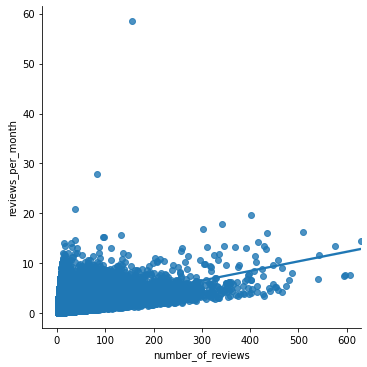

In [9]:
# Create a scatterplot for the "number_of_reviews" and "reviews_per_month" columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df_geo)

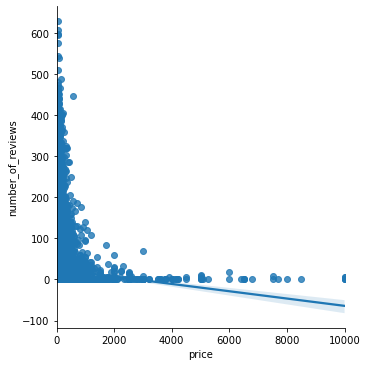

In [27]:
# Create a scatterplot for the "price" and "availability_365" columns in seaborn

sns.lmplot(x = 'price', y = 'number_of_reviews', data = df)

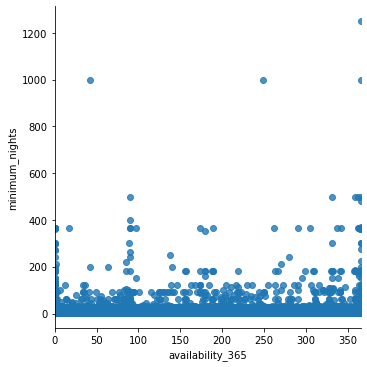

In [33]:
# Create a scatterplot for the "price" and "availability_365" columns in seaborn

sns.lmplot(x = 'availability_365', y = 'minimum_nights', data = df)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### 5. State your hypothesis in a markdown cell within your Jupyter notebook.

#### Hypothesis: The higher the number of reviews, the higher number of reviews per month.

### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [ ]:
# Create df_reviews as I was having error message further down

df_reviews = df_geo[['id', 'host_id', 'reviews_per_month', 'number_of_reviews']].copy()

In [15]:
# Create df_reviews 

df_min_avaail = df[['id', 'host_id', 'calculated_host_listings_count', 'price']].copy()

In [42]:
# Check for missing values

df_reviews.isnull().sum()

id                   0
host_id              0
reviews_per_month    0
number_of_reviews    0
dtype: int64

In [16]:
# Check for missing values

df_listings.isnull().sum()

id                                0
host_id                           0
calculated_host_listings_count    0
price                             0
dtype: int64

In [28]:
# Reshape variables

x = df_reviews['number_of_reviews'].values.reshape(-1,1)
y = df_reviews['reviews_per_month'].values.reshape(-1,1)

In [29]:
x

array([[ 9],
       [45],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]])

In [30]:
y

array([[0.21],
       [0.38],
       [0.72],
       ...,
       [0.72],
       [0.72],
       [0.72]])

In [17]:
# Reshape variables for Listings

x = df_listings['price'].values.reshape(-1,1)
y = df_listings['calculated_host_listings_count'].values.reshape(-1,1)

### 7. Split the data into two sets: a training set and a test set.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

### 8. Run a linear regression on the data.
#### - First, fit the model you created to the training set.

In [19]:
# Create a regression object

regression = LinearRegression()

In [20]:
# Fit training model

regression.fit(x_train, y_train)

LinearRegression()

#### - Then, create a prediction for y on the test set.

In [21]:
# Create prediction for y variable

y_predicted = regression.predict(x_test)

### 9. Create a plot that shows the regression line on the test set.

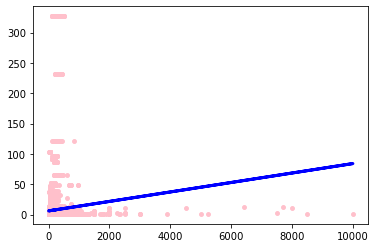

In [22]:
# Create plot that shows the regression line from the model on test set

plot_test = plt
plot_test.scatter(x_test, y_test, color = 'pink', s = 15)
plot_test.plot(x_test, y_predicted, color = 'blue', linewidth =3)
plot_test.show()

### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### The model is slightly lower than the data.

### 11. Check the model performance statistics—MSE and R2.

In [40]:
# Print model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01947931]]
Mean squared error:  1.4744363428266516
R2 score:  0.3173065020507978


In [39]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

### 12. Compare the predicted y values with the actual y values in a dataframe.

In [41]:
# Create a dataframe comparing actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,0.72,0.790602
1,0.40,0.887998
2,0.35,0.887998
3,1.36,1.043833
4,0.12,0.868519


### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
#### - Include any reflections you have on the impact of possible data bias.

#### I think my model performed poorly.
#### There is a noticable difference between the actual and predicted y values.
#### The model doesn't do a great job of explaining the relationship between the variables.
#### The relationship doesn’t follow the straight regression line, therefore the straight regression line will not be a good predicition indicator.